In [314]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [315]:
df = pd.read_csv('../data/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [316]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [317]:
df[['Age', 'Fare']] = df[['Age', 'Fare']].fillna(df[['Age', 'Fare']].mean())

In [318]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [319]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [320]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [321]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

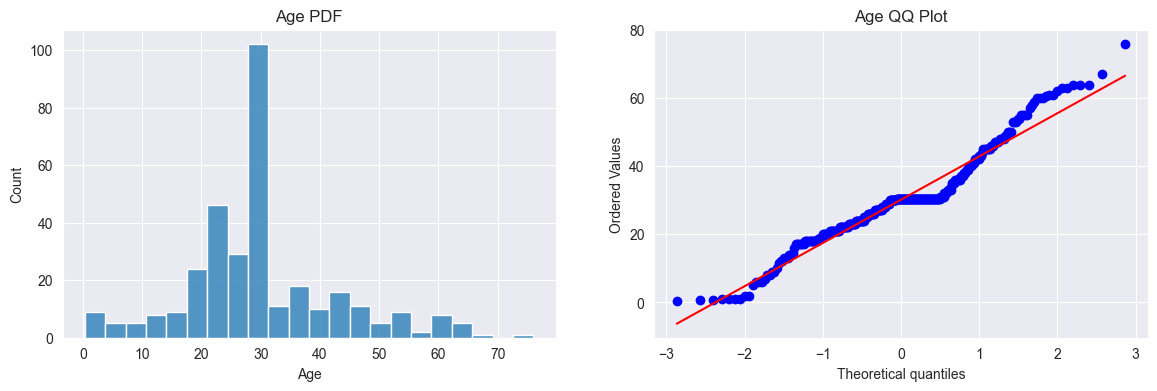

In [322]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(x = X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x = X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

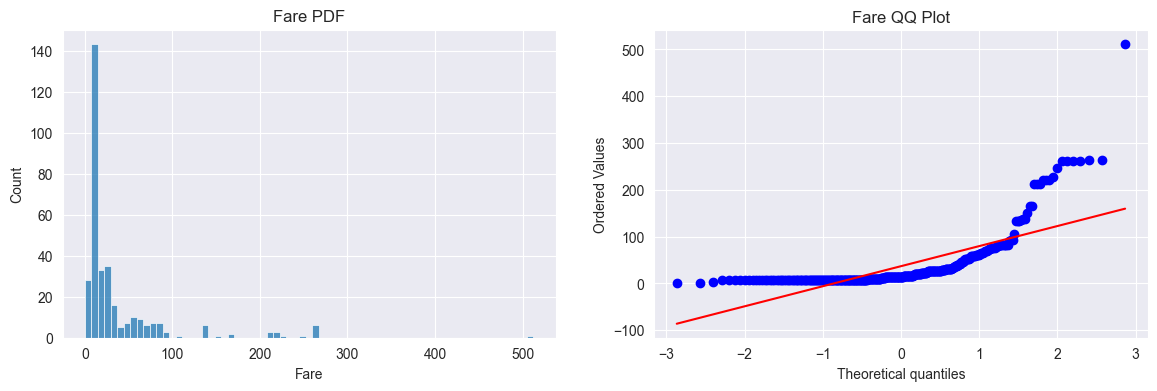

In [323]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(x = X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x = X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [324]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [325]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [326]:
y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6071428571428571
Accuracy DT 0.6071428571428571


In [327]:
trf = FunctionTransformer(func=np.log1p)

In [328]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [329]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [330]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [331]:
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6190476190476191
Accuracy DT 0.6190476190476191
